In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lego = pd.read_csv('../data/lego_sets.csv')

themes = pd.read_csv('../data/parent_themes.csv')

lego_copia = lego.copy()
themes_copia = themes.copy()

In [111]:
lego_copia.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [112]:
themes_copia.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


# Calidad de datos

## ¿Qué columnas tienen valores faltantes? ¿En qué proporción?

Columna: set_num | Faltantes: 153
Columna: name | Faltantes: 153
Columna: year | Faltantes: 0
Columna: num_parts | Faltantes: 5060
Columna: theme_name | Faltantes: 153
Columna: parent_theme | Faltantes: 0


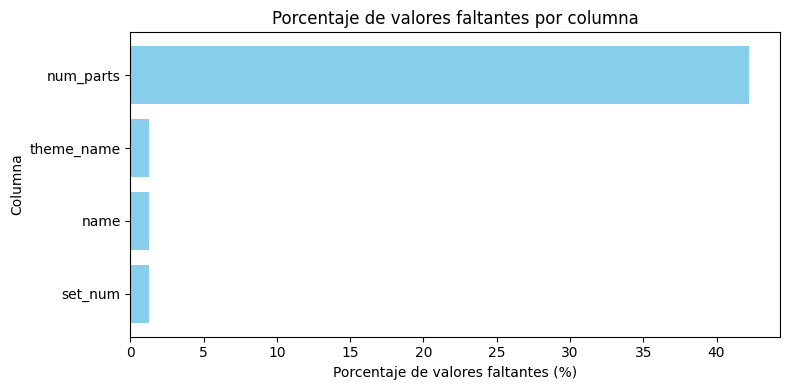

In [113]:
#cantidad de faltantes por columna
col_fal = lego_copia .isna().sum()

#porcentaje de faltantes
col_fal_prop = (lego_copia .isna().mean() * 100).round(2)

#nuevo df de faltantes
df_faltantes = pd.DataFrame({'Cantidad': col_fal, 'Proporción': col_fal_prop})


# recorremos el df y mostramos ordenado
for nombre, faltantes, porcentaje in df_faltantes.itertuples():
    print(f"Columna: {nombre} | Faltantes: {faltantes}")



#filtramos que no sean 0
df_faltantes_filtrado = df_faltantes[df_faltantes['Cantidad'] > 0]
#ordenamos
df_faltantes_filtrado = df_faltantes_filtrado.sort_values(by='Cantidad', ascending=True)


#figura
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(df_faltantes_filtrado.index, df_faltantes_filtrado['Proporción'], color='skyblue')
ax.set_xlabel('Porcentaje de valores faltantes (%)')
ax.set_ylabel('Columna')
ax.set_title('Porcentaje de valores faltantes por columna')

fig.tight_layout()
plt.show()


La columna **`num_parts`** presenta un alto porcentaje de valores faltantes (42%), lo que implica que no todos los sets tienen registrada la cantidad de piezas.

## ¿Cantidad de duplicados en set_num?

In [114]:
duplicados = lego_copia [lego_copia ['set_num'].duplicated()]

print("Cantidad de duplicados en 'set_num':", duplicados.shape[0])


# subset=columna de duplicados, keep = cual conservar
lego_sin_duplicados = lego.drop_duplicates(subset="set_num", keep="first")



print("Antes:", len(lego_copia ))
print("Después:", len(lego_sin_duplicados))



Cantidad de duplicados en 'set_num': 152
Antes: 11986
Después: 11834


El campo **`set_num`** presenta 152 registros duplicados. Que fueron eliminados en la limpieza.

## ¿num_parts tiene valores atipicos o ceros raros?

Cantidad de sets con 0 piezas: 271
count    6926.000000
mean      163.782558
std       334.206873
min        -1.000000
25%        10.250000
50%        46.000000
75%       173.000000
max      5922.000000
Name: num_parts, dtype: float64
Cantidad de outliers detectados: 759


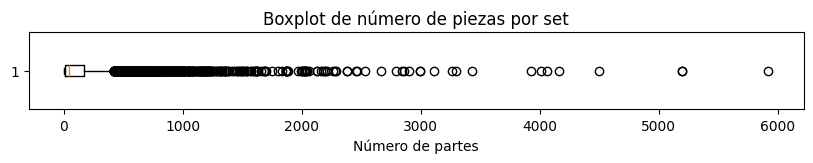

In [115]:

ceros = (lego_copia ['num_parts'] == 0).sum()
print(f"Cantidad de sets con 0 piezas: {ceros}")

# Calcular media y mediana para ver la simetría,
"""
media = lego['num_parts'].mean()
mediana = lego['num_parts'].median()
print(f"Media: {media:.2f}, Mediana: {mediana:.2f}")

if abs(media - mediana) < 0.05 * mediana:
    print("Distribución aproximadamente simétrica → z-score podría funcionar.")
elif media > mediana:
    print("Distribución asimétrica positiva (cola a la derecha) → mejor usar IQR ")
else:
    print("Distribución asimétrica negativa (cola a la izquierda) → mejor usar IQR")

"""
#calculamos las estadisticas
print(lego_copia ['num_parts'].describe())


#se encontraron valores negativos que no deberian estar, se cambian a nan
lego_copia ['num_parts'] = lego_copia ['num_parts'].replace(-1, np.nan)

#sacamos los faltantes
num_parts_limpio = lego_copia ['num_parts'].dropna().astype(float)


# Detectar outliers con IQR usando la columna limpia
Q1 = num_parts_limpio .quantile(0.25)
Q3 = num_parts_limpio .quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers = num_parts_limpio [(num_parts_limpio  < lim_inf) | (num_parts_limpio  > lim_sup)]
print(f"Cantidad de outliers detectados: {len(outliers)}")


# Visualización con boxplot
fig, ax = plt.subplots(figsize=(10, 1))

ax.boxplot(num_parts_limpio, vert=False, showfliers=True)

ax.set_title('Boxplot de número de piezas por set')
ax.set_xlabel('Número de partes')

plt.show()

 Se identificaron **271 sets con 0 piezas**.

 La comparación entre media y mediana muestra que la distribución de **`num_parts`** está sesgada hacia la derecha: la mayoría de los sets tienen pocas piezas, pero existen algunos muy grandes.

# Volumen de sets por año

## ¿Cual es el año con mas y con menos sets?

In [116]:

#sets por año
sets_por_año = lego_copia .groupby('year').size()



# Año con más sets
año_max = sets_por_año.idxmax() #busca el indice(año) con mayor valor
max_sets = sets_por_año.max()

# Año con menos sets
año_min = sets_por_año.idxmin() #busca el indice(año) con menor valor
min_sets = sets_por_año.min()

print(f"Año con más sets: {año_max} ({max_sets} sets)")
print(f"Año con menos sets: {año_min} ({min_sets} sets)")




Año con más sets: 2014 (732 sets)
Año con menos sets: 1960 (3 sets)


Conclusión:
- El año con más sets fue 2014 , con 732 sets lanzados.
- El año con menos sets fue 1960, con solo 3 sets registrados.

Esto muestra la amplitud de crecimiento de LEGO en el tiempo.

## ¿Cómo creció la cantidad de sets con el tiempo?

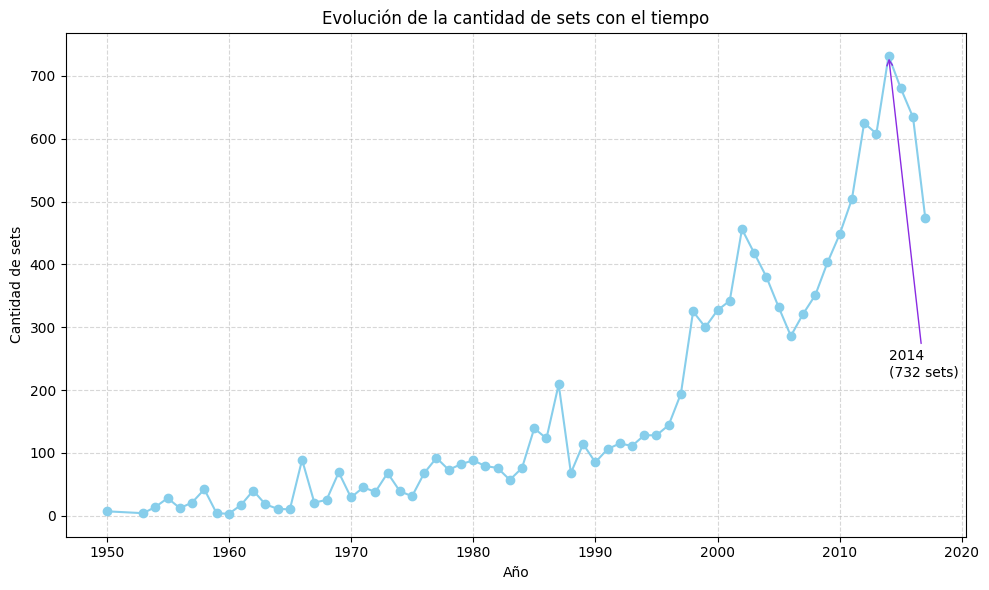

In [117]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sets_por_año.index, sets_por_año.values, marker='o', linestyle='-', color='skyblue')

ax.annotate(f'{año_max}\n({sets_por_año.loc[año_max]} sets)',
            xy=(año_max, sets_por_año.loc[año_max]),
            xytext=(año_max, sets_por_año.max() - 510),
            ha='left',
            arrowprops=dict(arrowstyle='->', color='blueviolet'))

ax.set_title('Evolución de la cantidad de sets con el tiempo')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de sets')
ax.grid(True, linestyle='--', alpha=0.5)

fig.tight_layout()
plt.show()




Conclusión:
- Se observa un crecimiento sostenido en el número de sets lanzados, especialmente a partir de la década de 1990.

El pico en 2014 refleja el momento de mayor expansión en la historia registrada de LEGO.

## ¿Cuál fue el primer y el más reciente año con sets?

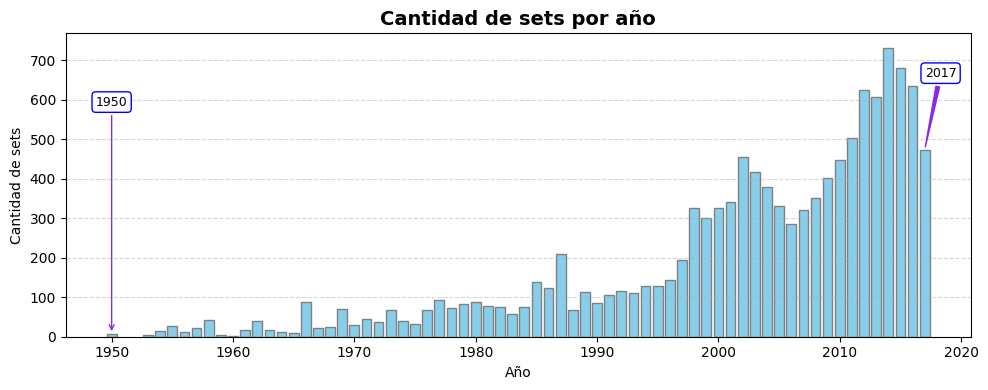

In [118]:


primer_año = sets_por_año.index.min()
ultimo_año = sets_por_año.index.max()



fig, ax = plt.subplots(figsize=(10, 4))

bars = ax.bar(sets_por_año.index, sets_por_año.values, color='skyblue', edgecolor='gray')

# Primer año
ax.annotate(f'{primer_año}',
            xy=(primer_año, sets_por_año.loc[primer_año]),
            xytext=(primer_año, sets_por_año.max() * 0.8),
            ha='center',
            arrowprops=dict(arrowstyle='->', color='blueviolet'),
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1))

# Último año
ax.annotate(f'{ultimo_año}',
            xy=(ultimo_año, sets_por_año.loc[ultimo_año]),
            xytext=(ultimo_año, sets_por_año.max() * 0.9),
            ha='left',
            arrowprops=dict(arrowstyle='wedge', color='blueviolet'),
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1))


ax.set_title('Cantidad de sets por año', fontsize=14, fontweight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de sets')
ax.grid(axis='y', linestyle='--', alpha=0.5)

fig.tight_layout()

plt.show()

El primer set se lanzó en 1950 y el más reciente en 2017.

# Piezas por set

## ¿Cuál es el set con más piezas? ¿Top 10?

In [119]:
#obtemenos el nombre, año y piezas del que tiene mas piezas
set_max_piezas = lego_copia.loc[lego["num_parts"].idxmax(), ["name", "year", "num_parts"]]
print(f"Set con más piezas: {set_max_piezas}")


Set con más piezas: name         Taj Mahal
year              2008
num_parts       5922.0
Name: 170, dtype: object


In [120]:

#seleccionamos nombre, año y partes de los 10 con mas piezas
top10_piezas = lego_copia.nlargest(10, "num_parts")[["name", "year", "num_parts"]]

#display muestra en formato tabular en vez de plano
display(top10_piezas)

,name,year,num_parts
170,Taj Mahal,2008,5922.0
1371,Window Exploration Bag,2010,5200.0
161,Millennium Falcon - UCS,2007,5195.0
3225,Personalised Mosaic Portrait,2016,4501.0
234,Big Ben,2016,4166.0
7723,The Disney Castle,2016,4060.0
236,Assembly Square,2017,4009.0
3891,Bucket Wheel Excavator,2016,3928.0
162,Eiffel Tower 1:300 Scale,2007,3428.0
8199,Sandcrawler,2014,3294.0


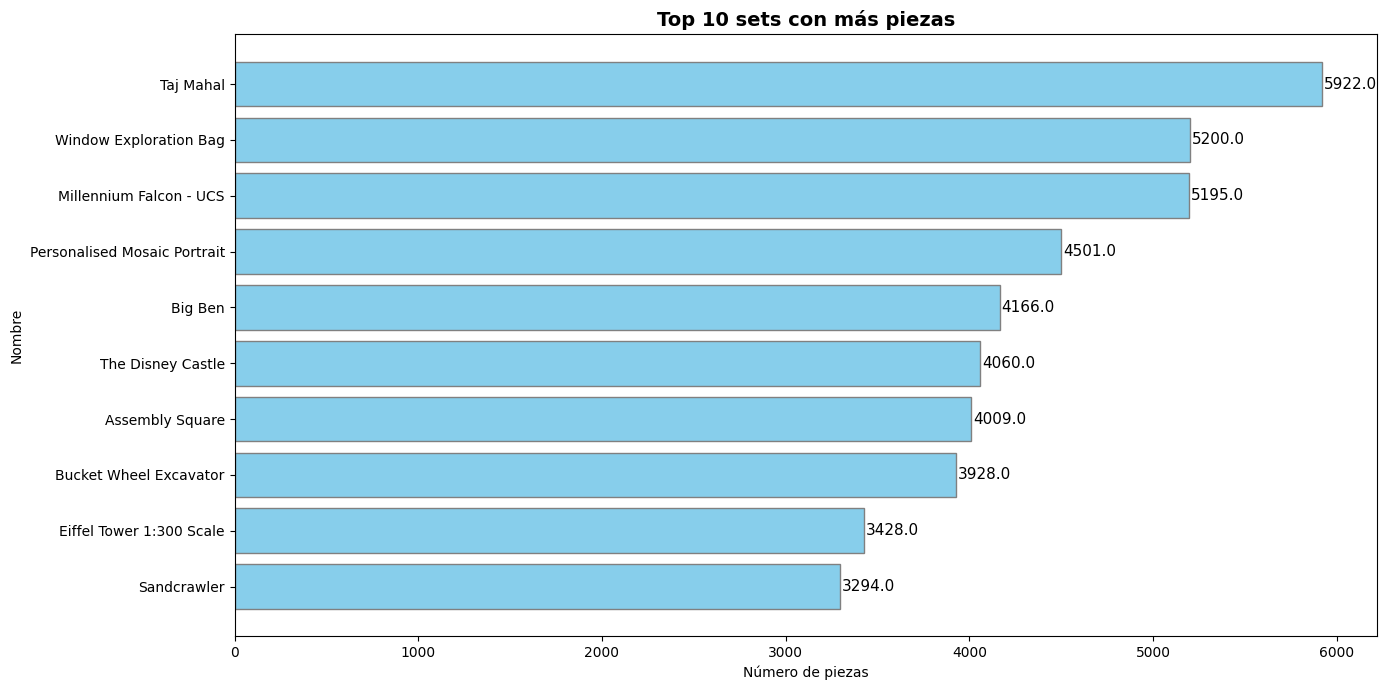

In [121]:


top10_piezas_ordenado = top10_piezas.sort_values("num_parts")

fig, ax = plt.subplots(figsize=(14, 7))


ax.barh(top10_piezas_ordenado["name"], top10_piezas_ordenado["num_parts"], color="skyblue", edgecolor="gray")

for i, valor in enumerate(top10_piezas_ordenado["num_parts"]):
    ax.text(valor + 10,
            i,
            str(valor),
            va='center',
            fontsize=11)

ax.set_title("Top 10 sets con más piezas", fontsize=14, fontweight='bold')
ax.set_xlabel("Número de piezas")
ax.set_ylabel("Nombre")

fig.tight_layout()

plt.show()

El set con más piezas es el Taj Mahal, lanzado en 2008 con 5922 piezas.

## ¿Cómo es la distribución de num_parts?

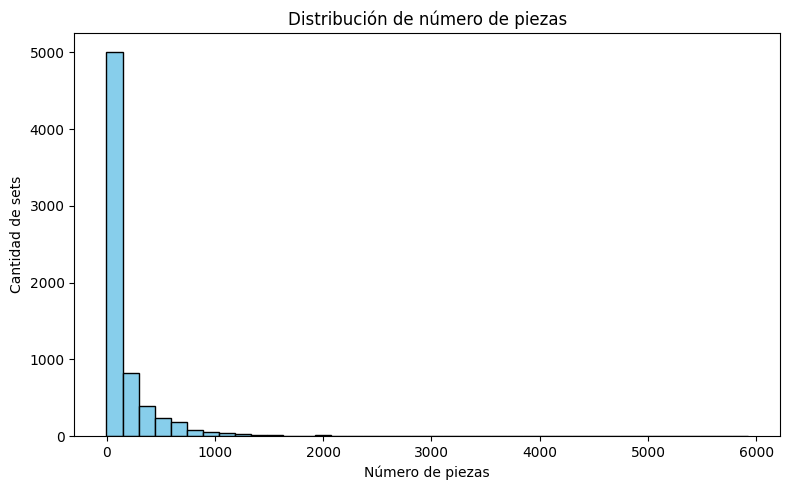

Empty DataFrame
Columns: [set_num, name, year, num_parts, theme_name, parent_theme]
Index: []
Distribución de num_parts:count    6926.000000
mean      163.782558
std       334.206873
min        -1.000000
25%        10.250000
50%        46.000000
75%       173.000000
max      5922.000000
Name: num_parts, dtype: float64


In [122]:


fig, ax = plt.subplots(figsize=(8,5))


ax.hist(
    lego['num_parts'],
    bins=40,
    color='skyblue',
    edgecolor='black'
)

# Personalización usando métodos de ax
ax.set_title('Distribución de número de piezas')
ax.set_xlabel('Número de piezas')
ax.set_ylabel('Cantidad de sets')

fig.tight_layout()
plt.show()

print(lego_copia[lego_copia['num_parts'] == -1])
print(f"Distribución de num_parts:{lego['num_parts'].describe()}" )


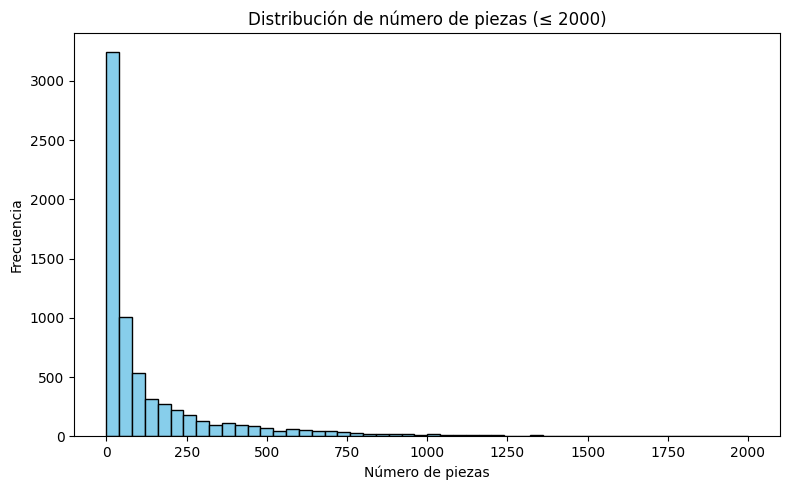

In [123]:


fig, ax = plt.subplots(figsize=(8,5))

ax.hist(
    lego[lego_copia['num_parts'] <= 2000]['num_parts'],
    bins=50,
    color='skyblue',
    edgecolor='black'

)

ax.set_title('Distribución de número de piezas (≤ 2000)')
ax.set_xlabel('Número de piezas')
ax.set_ylabel('Frecuencia')
fig.tight_layout()
plt.show()


La mayoría de los sets tienen pocas piezas, pero existen outliers con miles de piezas que sesgan la media hacia arriba hasta 163.85

## ¿Cambió el tamaño promedio de los sets a lo largo de los años?

year
1950     8.666667
1953     1.000000
1954    17.428571
1955    45.166667
1956    11.888889
Name: num_parts, dtype: float64
Año con mayor promedio: 2017 (307 piezas)
Año con menor promedio: 1953 (1 piezas)


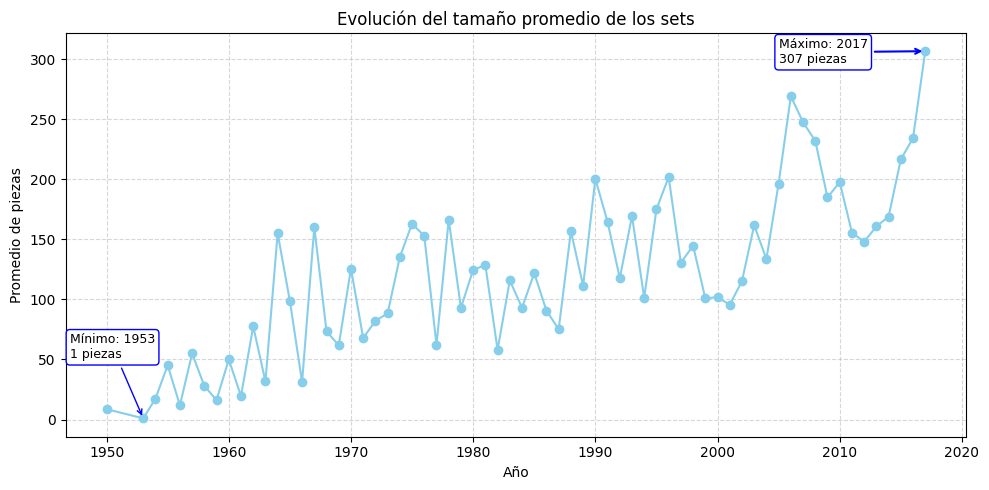

In [124]:
# Promedio de piezas por año
promedio_por_año = lego_copia.groupby('year')['num_parts'].mean()

print(promedio_por_año.head())  # primeras filas para verificar

max_year = promedio_por_año.idxmax()
max_value = promedio_por_año.max()

min_year = promedio_por_año.idxmin()
min_value = promedio_por_año.min()

print(f"Año con mayor promedio: {max_year} ({max_value:.0f} piezas)")
print(f"Año con menor promedio: {min_year} ({min_value:.0f} piezas)")

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10,5))

# Línea principal
ax.plot(promedio_por_año.index, promedio_por_año.values, marker='o', color='skyblue')

# Anotación máximo
ax.annotate(
    f'Máximo: {max_year}\n{max_value:.0f} piezas',
    xy=(max_year, max_value),
    xytext=(max_year-12, max_value-10),
    arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1)
)

# Anotación mínimo
ax.annotate(
    f'Mínimo: {min_year}\n{min_value:.0f} piezas',
    xy=(min_year, min_value),
    xytext=(min_year-6, min_value+50),
    arrowprops=dict(arrowstyle='->', color='blue'),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1)
)

# Personalización con métodos de ax
ax.set_title('Evolución del tamaño promedio de los sets')
ax.set_xlabel('Año')
ax.set_ylabel('Promedio de piezas')
ax.grid(True, linestyle='--', alpha=0.5)

fig.tight_layout()
plt.show()

El tamaño promedio de los sets ha aumentado con el tiempo, reflejando una tendencia hacia sets más complejos.

# Análisis de Star Wars en LEGO

## ¿Qué porcentaje del catálogo total de LEGO representa Star Wars?

Total de sets LEGO: 11833
Total de sets Star Wars: 609
Porcentaje Star Wars: 5.15%


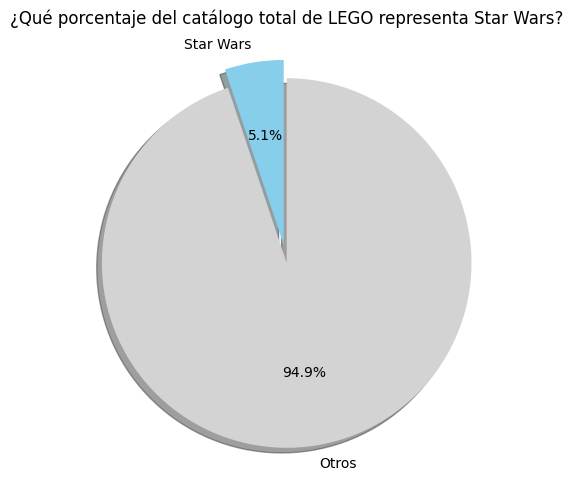

In [125]:

# Filtrar sets de Star Wars
sw = lego_copia[lego_copia["parent_theme"] == "Star Wars"]

# Calcular totales
total_sets = lego_copia["set_num"].nunique()
total_sw = sw["set_num"].nunique()
porcentaje_sw = total_sw / total_sets * 100

print(f"Total de sets LEGO: {total_sets}")
print(f"Total de sets Star Wars: {total_sw}")
print(f"Porcentaje Star Wars: {porcentaje_sw:.2f}%")



fig, ax = plt.subplots(figsize=(6,6))

# Gráfico de pastel en el eje ax
ax.pie(
    [total_sw, total_sets - total_sw],
    labels=["Star Wars", "Otros"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["skyblue", "lightgray"],
    explode=(0.1, 0),
    shadow=True
)

# Título con método de ax
ax.set_title("¿Qué porcentaje del catálogo total de LEGO representa Star Wars?")

plt.show()


Representa el 5.1% del catálogo total de LEGO

## ¿Cómo ha evolucionado Star Wars a lo largo de los años?

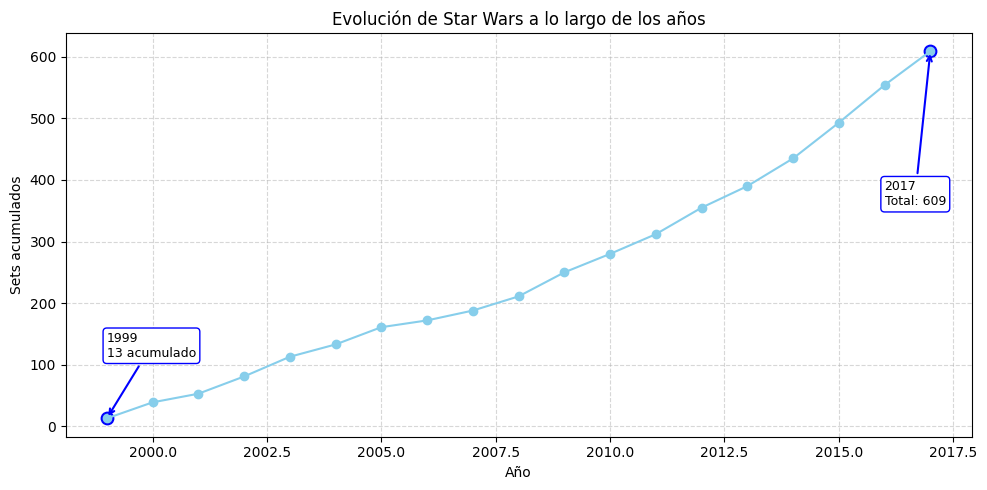

In [126]:

# Filtrar solo sets de Star Wars
sw_sets = lego_copia[lego_copia['parent_theme'] == "Star Wars"]

# Contar sets por año
sw_por_año = sw_sets.groupby('year')['set_num'].count()

#alcular acumulado
sw_acum = sw_por_año.cumsum()

# Primer y último año
primer_anio = sw_acum.index.min()
ultimo_anio = sw_acum.index.max()
total_sw = sw_acum.loc[ultimo_anio]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10,5))

# Línea principal
ax.plot(sw_acum.index, sw_acum.values, marker='o', color='skyblue')

# Primer año
ax.scatter(primer_anio, sw_acum.loc[primer_anio], s=80, color='blue')
ax.annotate(
    f"{primer_anio}\n{int(sw_acum.loc[primer_anio])} acumulado",
    xy=(primer_anio, sw_acum.loc[primer_anio]),
    xytext=(primer_anio, sw_acum.loc[primer_anio]+100),
    arrowprops=dict(arrowstyle="->", color="blue", lw=1.5),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1),
    fontsize=9
)

# Último año
ax.scatter(ultimo_anio, sw_acum.loc[ultimo_anio], s=80, color='blue')
ax.annotate(
    f"{ultimo_anio}\nTotal: {total_sw}",
    xy=(ultimo_anio, sw_acum.loc[ultimo_anio]),
    xytext=(ultimo_anio - 1, sw_acum.loc[ultimo_anio] - 250),
    arrowprops=dict(arrowstyle="->", color="blue", lw=1.5),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1),
    fontsize=9
)

# Personalización con métodos de ax
ax.set_title("Evolución de Star Wars a lo largo de los años")
ax.set_xlabel("Año")
ax.set_ylabel("Sets acumulados")
ax.grid(True, linestyle="--", alpha=0.5)

fig.tight_layout()
plt.show()


El primer set de Star Wars se lanzó en **1999**.
Desde entonces se han producido más de **600 sets**.

## ¿Cómo se compara Star Wars con otras temáticas populares?

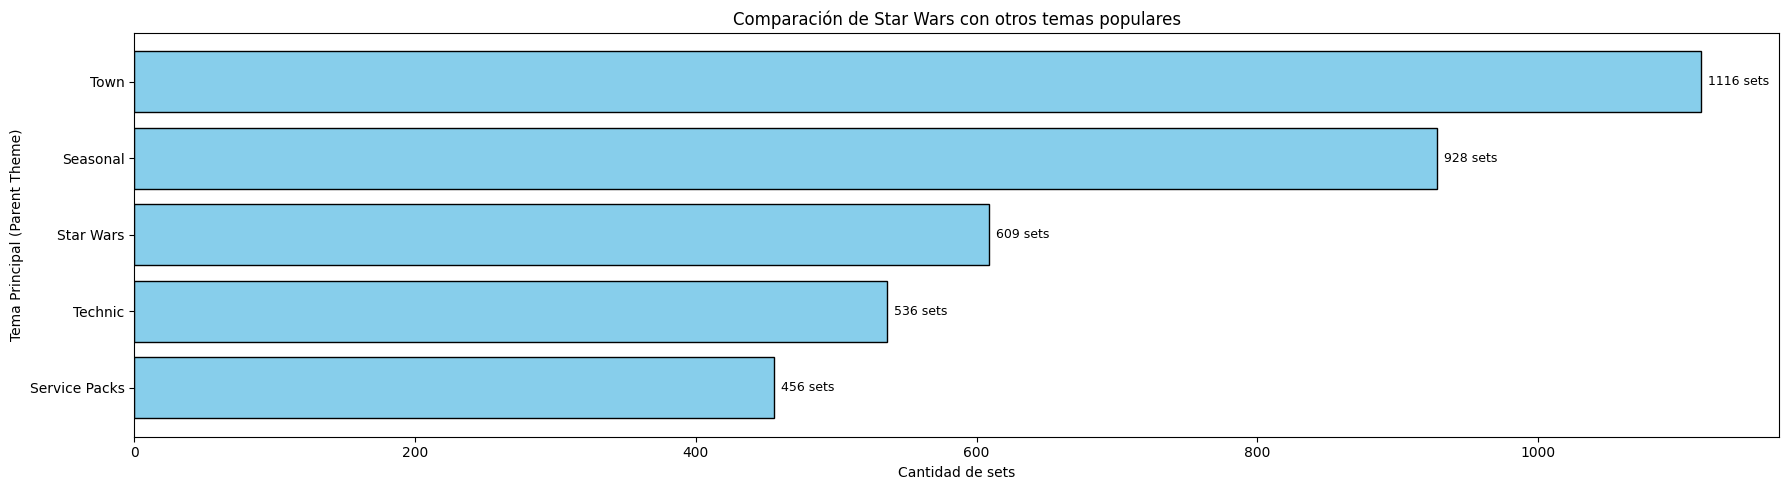

In [128]:
# Contar sets por parent_theme
sets_por_parent = lego_copia.groupby("parent_theme")["set_num"].count().sort_values(ascending=False)

# Seleccionar Top 5 parent themes
top5_parent = sets_por_parent.head(5).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(18, 5))

ax.barh(top5_parent.index, top5_parent.values, color="skyblue", edgecolor="black")

for i, valor in enumerate(top5_parent):
    ax.text(
        valor + 5,
        i,
        f"{valor} sets",
        va='center',
        fontsize=9
    )

ax.set_title("Comparación de Star Wars con otros temas populares")
ax.set_xlabel("Cantidad de sets")
ax.set_ylabel("Tema Principal (Parent Theme)")

fig.tight_layout()

plt.show()


Comparado con otras temáticas populares (Town, Technic, Seasonal), Star Wars se mantiene entre los más prolíficos.

# Licenciados vs no licenciados

## ¿Qué proporción de sets de LEGO son licenciados vs no licenciados?

📊 Proporción de sets licenciados vs no licenciados:
is_licensed
False    88.887035
True     11.112965
Name: proportion, dtype: float64


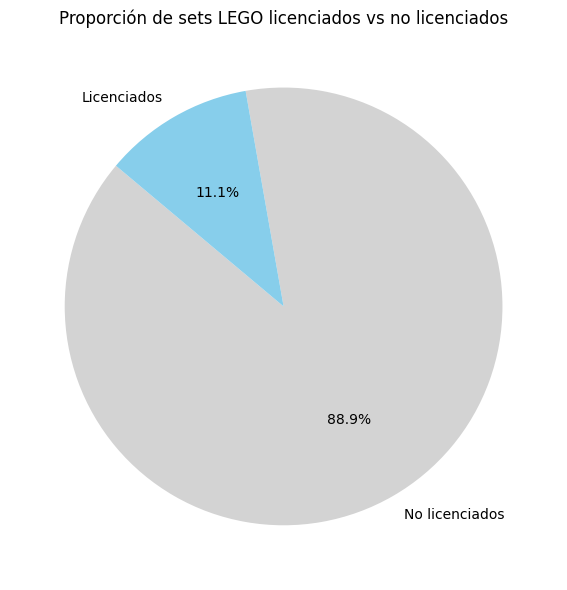

In [129]:


# JOIN: lego_sets.parent_theme ↔ parent_themes.name
lego_full = lego_copia.merge(
    themes_copia,
    left_on="parent_theme",
    right_on="name",
    how="left",
    suffixes=("", "_parent")
)


# Contar sets licenciados vs no licenciados
proporcion = lego_full['is_licensed'].value_counts(normalize=True) * 100

print("📊 Proporción de sets licenciados vs no licenciados:")
print(proporcion)




fig, ax = plt.subplots(figsize=(6,6))
ax.pie(
    proporcion,
    labels=['No licenciados','Licenciados'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightgray','skyblue']
)
ax.set_title("Proporción de sets LEGO licenciados vs no licenciados")
plt.tight_layout()
plt.show()

Los sets licenciados representan el 11.1% del catálogo total.

## ¿Cómo ha evolucionado el lanzamiento de sets licenciados vs no licenciados a lo largo del tiempo?

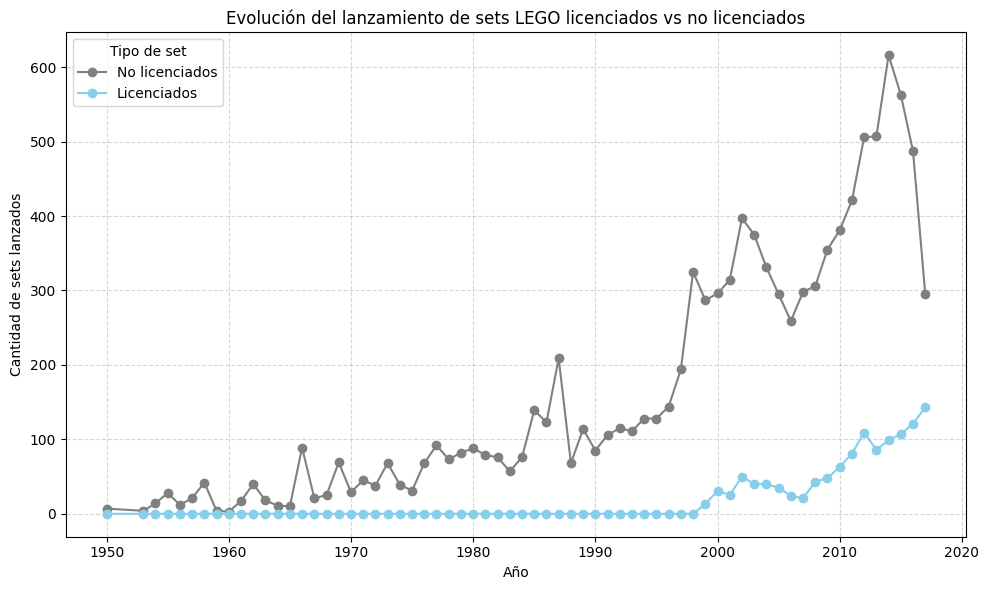

In [130]:
# Agrupar por año y licencia
evolucion = (
    lego_full.groupby(["year","is_licensed"])["set_num"]
    .count()
    .reset_index()
)

# Pivotear para tener columnas separadas
evolucion_pivot = evolucion.pivot(
    index="year",
    columns="is_licensed",
    values="set_num"
).fillna(0)

# Renombrar columnas para claridad
evolucion_pivot = evolucion_pivot.rename(
    columns={True:"Licenciados", False:"No licenciados"}
)

# Gráfico
fig, ax = plt.subplots(figsize=(10,6))
evolucion_pivot.plot(ax=ax, marker="o",  color=["gray","skyblue"])

ax.set_title("Evolución del lanzamiento de sets LEGO licenciados vs no licenciados")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad de sets lanzados")
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(title="Tipo de set")
plt.tight_layout()
plt.show()

Su lanzamiento se intensificó a partir de los años 2000.

## ¿Qué temáticas licenciadas tienen más sets?

📊 Temáticas licenciadas con más sets:
parent_theme
Star Wars                           609
Super Heroes                        242
Harry Potter                         67
The Hobbit and Lord of the Rings     40
Minecraft                            30
Name: set_num, dtype: int64


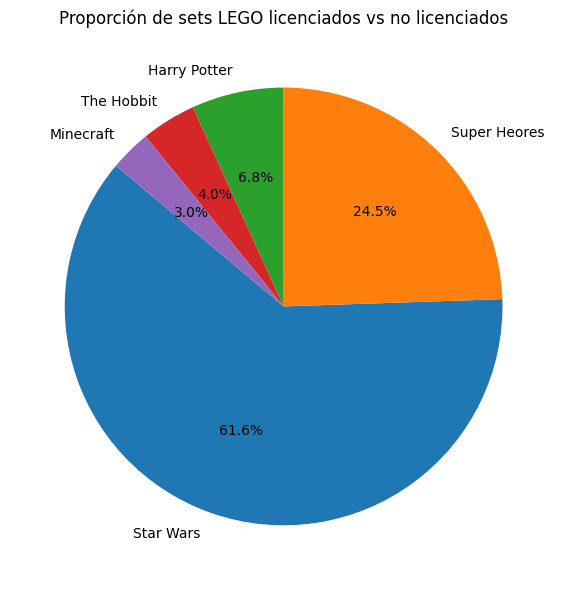

In [ ]:
# Filtrar solo licenciados
licenciados = lego_full[lego_full["is_licensed"] == True]

# Contar sets por temática licenciada
sets_por_licenciado = (
    licenciados.groupby("parent_theme")["set_num"]
    .count()
    .sort_values(ascending=False)
)

# Vemos los primeros 5
print("📊 Temáticas licenciadas con más sets:")
print(sets_por_licenciado.head(5))


fig, ax = plt.subplots(figsize=(6,6))
ax.pie(
    sets_por_licenciado.head(5),
    labels= ['Star Wars ', 'Super Heores', 'Harry Potter', 'The Hobbit', 'Minecraft'],
    autopct='%1.1f%%',
    startangle=140,

)
ax.set_title("Proporción de sets LEGO licenciados")
plt.tight_layout()
plt.show()

Entre los licenciados, destacan Star Wars, Harry Potter y Super Heroes como los de mayor volumen.